This Notebook analyses a dataset provided by a Yoga App.

The objectives are to analyse the year 2021 and identify trends, including:
 -  Most Followed Categories,
 - Trend of Subscribers,
 -  Most Active Months,
 -  Most Popular Classes, 
 -  Category Appreciation 


In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


%matplotlib inline 

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",message="The figure layout has changed to tight")


In [44]:
df = pd.read_csv('Lifestyle_data Final Project.csv')

In [45]:
df.head()

,class_date,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
0,1-2-2023,2,meditation,102,it,basic,3,it,6-1-2022,tv,2157,1
1,22-5-2023,241,power yoga,111,it,basic,1,it,11-5-2022,pc,6172,3
2,6-8-2022,173,power yoga,117,it,advanced,3,it,12-12-2021,pc,6255,2
3,8-8-2023,217,hatha,100,en,intermediate,3,uk,7-2-2022,tv,3317,4
4,11-3-2022,230,power yoga,113,fr,basic,2,fr,9-1-2020,pc,6159,1


In [46]:
df.shape

(999, 12)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   class_date         999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   coach_id           999 non-null    int64 
 4   language           999 non-null    object
 5   level              999 non-null    object
 6   challenge_id       999 non-null    int64 
 7   country            999 non-null    object
 8   subscription_date  999 non-null    object
 9   platform           999 non-null    object
 10  class_id           999 non-null    int64 
 11  stars              999 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 93.8+ KB


In [48]:
df.describe().round(2)

,user_uuid,coach_id,challenge_id,class_id,stars
count,999.00,999.00,999.00,999.00,999.00
mean,120.66,111.20,1.50,4171.79,3.02
std,71.17,6.55,1.12,1878.22,1.42
min,1.00,100.00,0.00,211.00,1.00
25%,58.50,106.00,1.00,3149.00,2.00
50%,118.00,111.00,1.00,4220.00,3.00
75%,182.00,117.00,3.00,6215.00,4.00
max,245.00,122.00,3.00,6399.00,5.00


In [49]:
df.nunique()

class_date           554
user_uuid            240
category               4
coach_id              23
language               3
level                  3
challenge_id           4
country                3
subscription_date    219
platform               3
class_id             636
stars                  5
dtype: int64

- The 'class_date' column indicates that the dataset covers a wide time span and that users are active during the analysed period.
- There are 240 unique users, but many participated in more than one class, given that there are 999 records.
- The dataset reflects a wide range of class offerings, with 4 class categories, 23 different coaches, and 636 unique class IDs.
- The class offerings suggest variety, with 3 languages and 3 difficulty levels available to meet different needs.  
- An international audience is indicated by users from 3 different countries.  
- Users can participate in classes through 3 different platforms.  
- The 5 unique rating values provide insight into how classes are perceived by users.



Prepare the time series and focus on the year 2021.

In [50]:
df['class_date'] = pd.to_datetime(df['class_date'], format= '%d-%m-%Y')

df_2021 = df[df['class_date'].dt.year == 2021].copy()

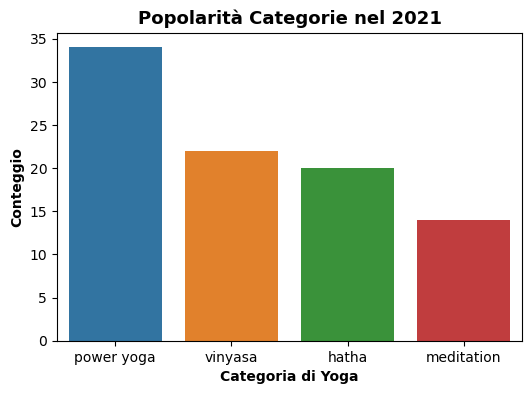

In [51]:
order_cat = df_2021['category'].value_counts().index
#Classifca categorie 

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x='category', order= order_cat)

plt.title('Popolarità Categorie nel 2021',fontsize = 13, fontweight = '900', color = 'black')
plt.xlabel("Categoria di Yoga",fontsize = 10,fontweight = '900', color = 'black')      
plt.ylabel("Conteggio",fontsize = 10,fontweight = '900', color = 'black')      

plt.show()

The category with the most classes is Power Yoga

In [52]:
timeser_2021 =(df_2021).copy()

timeser_2021.set_index('class_date',inplace=True)

In [53]:
mediaDfQuart_2021 = timeser_2021.resample('M').count()
mediaDfQuart_2021.index = mediaDfQuart_2021.index.month_name()

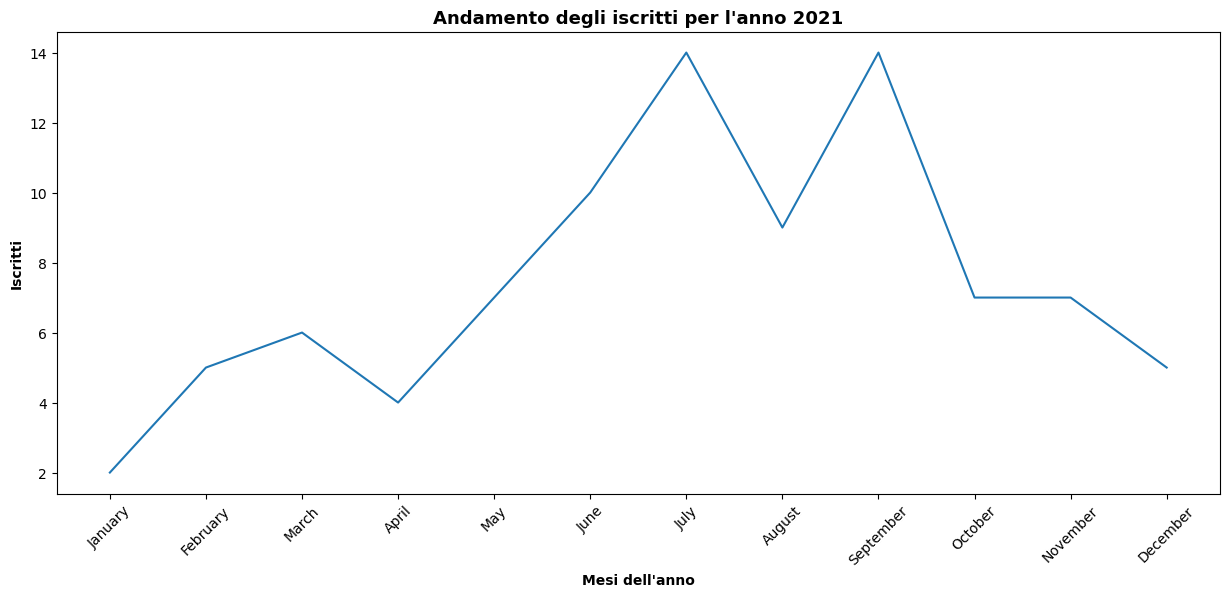

In [54]:
#Serie Temporale sugli abbonati
plt.figure(figsize=(15,6))
plt.plot(mediaDfQuart_2021.index,mediaDfQuart_2021['subscription_date'])

plt.title("Andamento degli iscritti per l'anno 2021", fontsize = 13,fontweight = '900', color = 'black')
plt.xlabel("Mesi dell'anno",fontsize = 10,fontweight = '900', color = 'black')      
plt.ylabel("Iscritti",fontsize = 10,fontweight = '900', color = 'black')      
plt.xticks(mediaDfQuart_2021.index,rotation = 45)

plt.show()

For most of the year under review, the graph shows an increase in write-offs.

In [55]:
df_2021['month'] = df_2021['class_date'].dt.month_name()

top_3_month = df_2021['month'].value_counts().head(3)

result_t = top_3_month.reset_index()

result_t.columns = ['month','N. of class made']

print('Most active month')
print(result_t.to_string(index=False))

Most active month
    month  N. of class made
     July                14
September                14
     June                10


The summer months are the busiest, people probably have more time and want to get out and about when the weather is nice, perhaps soaking up the evening sun.

In [56]:
top_class = df.groupby(['category','class_id'])['class_date'].count().reset_index()

top_class.columns = ['category', 'ID class', 'number of classes']

top_class = top_class.sort_values(by='number of classes',ascending=False).head(5)

print('Most popular classes')
print(top_class.to_string(index=False))

Most popular classes
  category  ID class  number of classes
power yoga      6215                  6
power yoga      6283                  6
power yoga      6263                  5
     hatha      3251                  5
power yoga      6237                  5


In [59]:
Cat_mean_2021 = df_2021.groupby('category')['stars'].mean().__round__(2).sort_values(ascending=False).reset_index()
Cat_mean_2021

,category,stars
0,meditation,3.57
1,power yoga,3.12
2,vinyasa,3.00
3,hatha,2.60


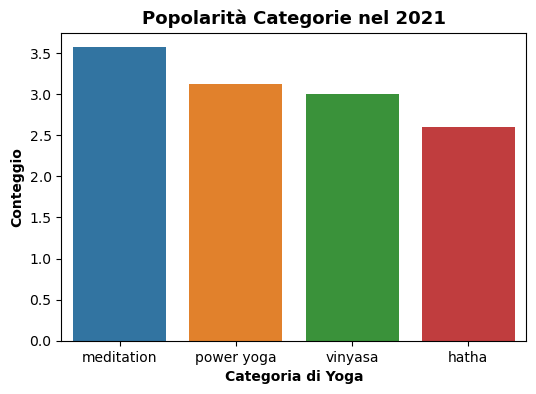

In [61]:
plt.figure(figsize=(6,4))
sns.barplot(data=Cat_mean_2021, x='category',y='stars')

plt.title('Categorie più apprezzate nel 2021',fontsize = 13, fontweight = '900', color = 'black')
plt.xlabel("Categoria di Yoga",fontsize = 10,fontweight = '900', color = 'black')      
plt.ylabel("Media Stars",fontsize = 10,fontweight = '900', color = 'black')      

plt.show()

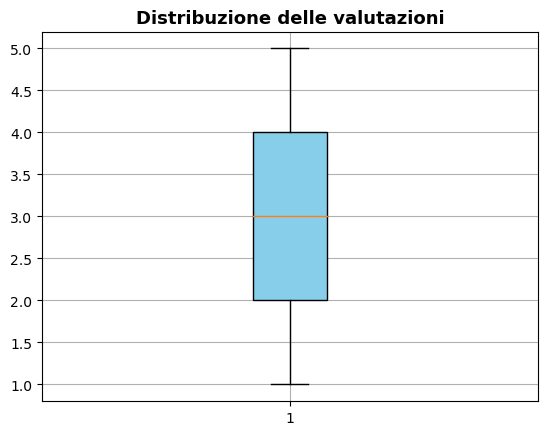

In [ ]:

plt.boxplot(data=df_2021, x= 'stars', patch_artist= True,boxprops= {'facecolor' : 'skyblue'})
plt.title('Distribuzione delle valutazioni',fontsize = 13, fontweight = '900', color = 'black')
plt.grid()
plt.show()

There are no outliers and the distribution of ratings is very homogeneous.

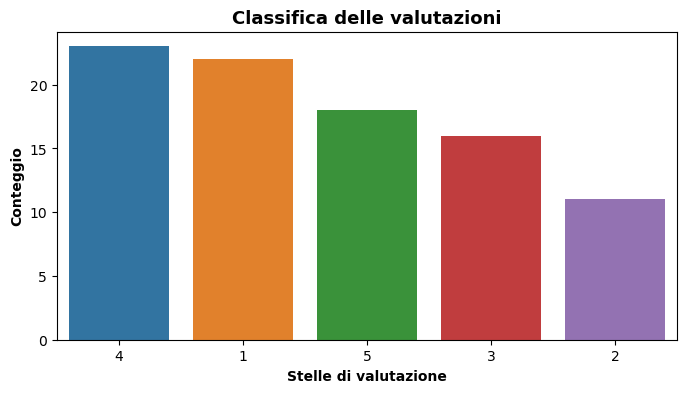

In [ ]:
stars_order = df_2021['stars'].value_counts().index

plt.figure(figsize=(8,4))
sns.countplot(data=df_2021, x= 'stars',order= stars_order)
plt.title('Classifica delle valutazioni', fontsize = 13, fontweight = '900', color = 'black')
plt.xlabel('Stelle di valutazione',fontsize = 10,fontweight = '900', color = 'black')      
plt.ylabel('Conteggio',fontsize = 10,fontweight = '900', color = 'black')      

plt.show()

We can see that the majority of the classes have a 4 star rating, which means that the classes in the app are highly rated.

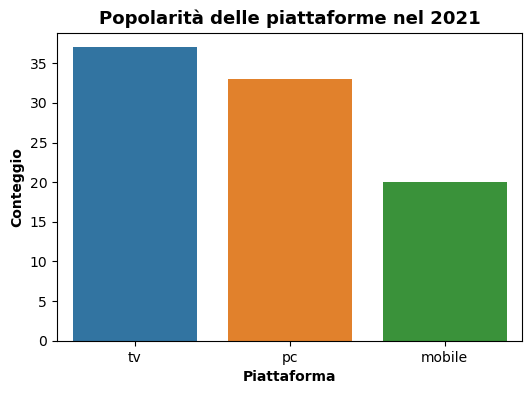

In [ ]:
order_plat = df_2021['platform'].value_counts().index
#Classifica sull'uso delle piattaforme
plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x='platform', order= order_plat)

plt.title('Popolarità delle piattaforme nel 2021',fontsize = 13, fontweight = '900', color = 'black')
plt.xlabel("Piattaforma",fontsize = 10,fontweight = '900', color = 'black')      
plt.ylabel("Conteggio",fontsize = 10,fontweight = '900', color = 'black')      

plt.show()

The TV is the favourite of the users, who are likely to be working out in a space as large as their living room.

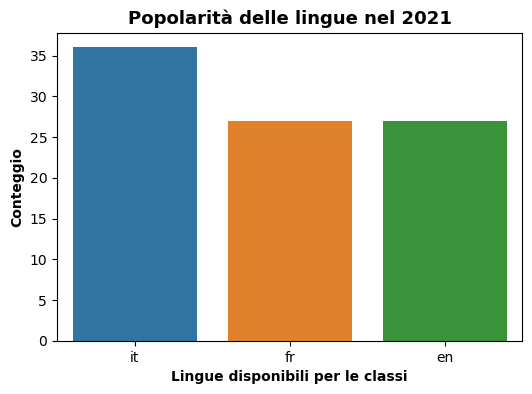

In [ ]:
lang_order = df_2021['language'].value_counts().index

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x = 'language',order = lang_order)

plt.title('Popolarità delle lingue nel 2021',fontsize = 13, fontweight = '900', color = 'black')
plt.xlabel("Lingue disponibili per le classi",fontsize = 10,fontweight = '900', color = 'black')      
plt.ylabel("Conteggio",fontsize = 10,fontweight = '900', color = 'black')      

plt.show()

Most popular language is Italian

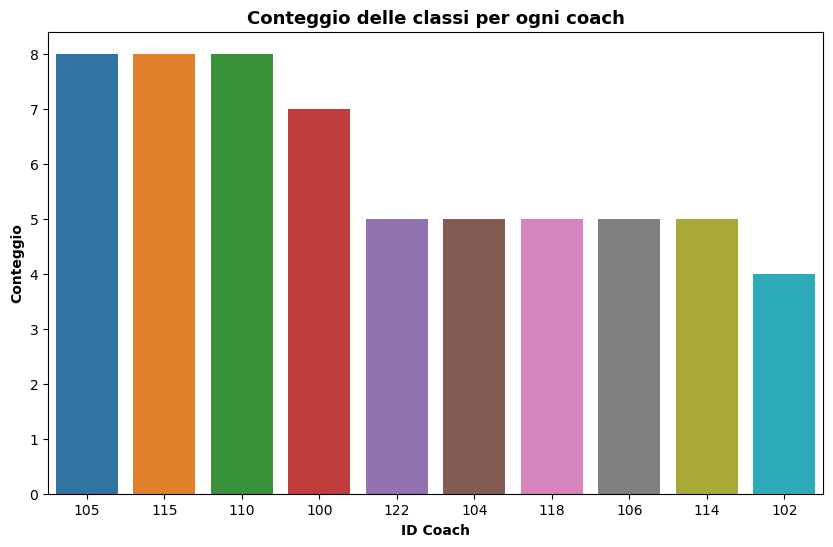

In [ ]:
order_coach = df_2021['coach_id'].value_counts()

top_10_coach = order_coach.head(10).index

plt.figure(figsize=(10,6))
sns.countplot(data=df_2021,x='coach_id',order=top_10_coach)

plt.title('Conteggio delle classi per ogni coach',fontsize = 13, fontweight = '900', color = 'black')
plt.xlabel("ID Coach",fontsize = 10,fontweight = '900', color = 'black')      
plt.ylabel("Conteggio",fontsize = 10,fontweight = '900', color = 'black')      

plt.show()

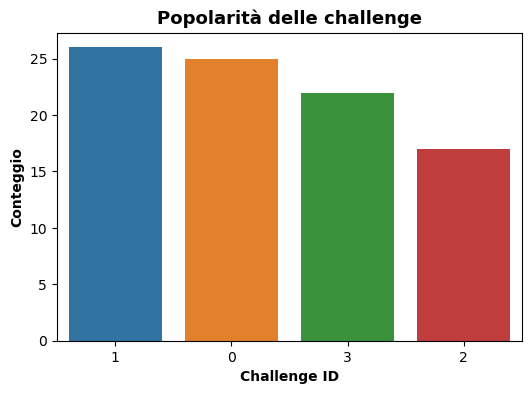

In [ ]:
order_chall = df_2021['challenge_id'].value_counts().index

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021,x='challenge_id', order = order_chall)

plt.title('Popolarità delle challenge',fontsize = 13, fontweight = '900', color = 'black')
plt.xlabel("Challenge ID",fontsize = 10,fontweight = '900', color = 'black')      
plt.ylabel("Conteggio",fontsize = 10,fontweight = '900', color = 'black')      

plt.show()

Most users prefer medium length challenges, as the most popular challenge is 1.

In [ ]:
usr_count = df_2021['user_uuid'].nunique()
coac_count= df_2021['coach_id'].nunique()
clas_count= df_2021['class_id'].nunique()
Class_date_uniq = df_2021['class_date'].nunique()
class_date_count = df_2021['class_date'].count()
avg_stars_score = df_2021['stars'].mean().__round__(2)

stats = {
    "N. Utenti nel 2021": usr_count,
    "N. Coach nel 2021": coac_count,
    'N. di classi nel 2021': clas_count,
    "N. giorni con accessi all'app": Class_date_uniq,
    "N. di classi fatte nel 2021": class_date_count,
    "Punteggio medio 'Stars' " : avg_stars_score
}

# Ciclo for per stampare le informazioni
for descrizione, valore in stats.items():
    print(f"{descrizione}: {valore}") 

N. Utenti nel 2021: 55
N. Coach nel 2021: 22
N. di classi nel 2021: 86
N. giorni con accessi all'app: 77
N. di classi fatte nel 2021: 90
Punteggio medio 'Stars' : 3.04


In a small summary of the statistics, we can see that the average "stars" score for the year 2021 is a good one.

In [ ]:
result_country = df_2021['country'].value_counts().reset_index()

result_country.columns = ['country','N. Utenti per country']

print('Country')
print(result_country.to_string(index=False))

Country
country  N. Utenti per country
     it                     36
     fr                     27
     uk                     27


Here we can see that Italy has the highest number of users (in fact, most of the classes are in the Italian language).

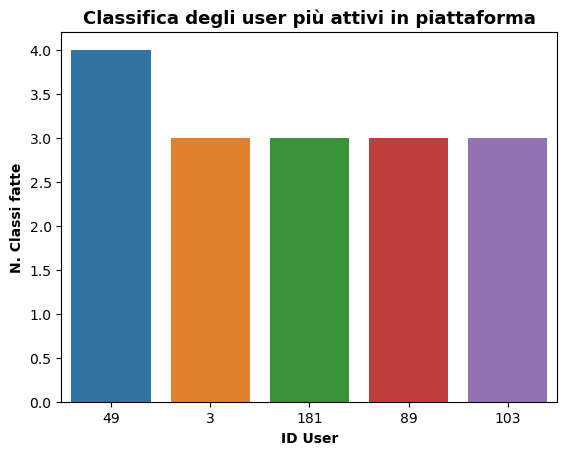

In [ ]:
top_user = df_2021.groupby('user_uuid')['class_date'].count().reset_index()
top_user.columns = ['ID_user','N. di Classi fatte']

top_user = top_user.sort_values(by='N. di Classi fatte',ascending=False).head(5)

sns.barplot(data=top_user,x='ID_user',y='N. di Classi fatte', order=top_user['ID_user'])
plt.title('Classifica degli user più attivi in piattaforma',fontsize = 13, fontweight = '900', color = 'black')
plt.xlabel("ID User",fontsize = 10,fontweight = '900', color = 'black')      
plt.ylabel("N. Classi fatte",fontsize = 10,fontweight = '900', color = 'black')      

plt.show()
#valutare se togliere

In [ ]:
Cat_mean_2021 = df_2021.groupby('category')['stars'].mean().__round__(2).sort_values(ascending=False).reset_index()

Meditation is the category with the highest star rating.

In [ ]:
df_2021.to_excel('dataset2021.xlsx',index=False)


Taking into account the size of the dataset under consideration,in this notebook we have seen that:

- The most followed category is power yoga, while the most appreciated  is meditation

- Membership has increased in most of the 2021

- The most popular class is 6215 in the Power Yoga category, made 6 times each
